In [2]:
import pyodbc
from meyerDB import cable_connection
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import HTML, display
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeavePOut
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
import sklearn.preprocessing as pp

# init db connection
conn = pyodbc.connect(cable_connection)
cursor = conn.cursor()
print('Database connection ok')

def display_table(data):
    html = "<table>"
    for row in data:
        html += "<tr>"
        for field in row:
            try:
                value = str(round(100*field, 1)).replace('.', ',') + '%'
            except:
                value = field
            html += "<td><h4>%s</h4><td>"%(value)
        html += "</tr>"
    html += "</table>"
    display(HTML(html))

Database connection ok


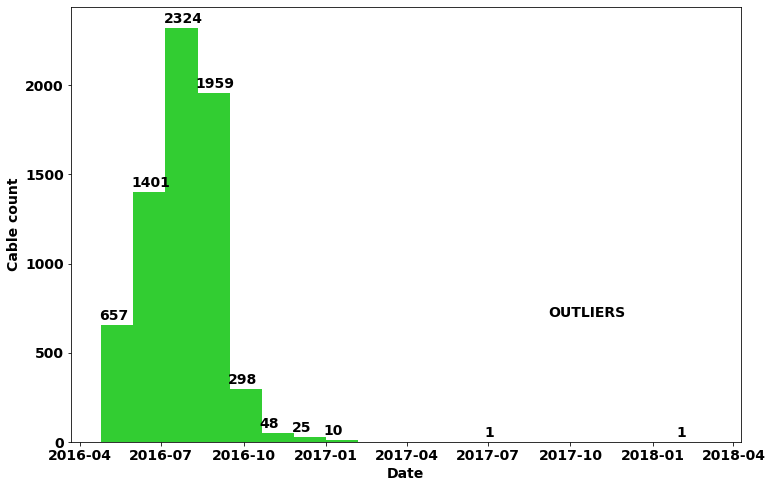

In [15]:
# Date outlier example

plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'

cursor.execute("SELECT ready FROM routed WHERE project_id=1391 AND ready IS NOT NULL order by ready")
data = np.array(cursor.fetchall())
plt.figure(figsize=(12, 8))
density, bins, _ = plt.hist(data, bins=19, color='limegreen')
count = np.array(density).astype('int32')
outliers = []
for x,y,num in zip(bins, density, count):
    if num != 0:
        plt.text(x-2, y+30, num, fontsize=14)
        if num==1:
            outliers.append(x)
plt.text(outliers[0]+70, 700, 'OUTLIERS', fontsize=14)

plt.xlabel('Date', fontsize=14, fontweight='bold')
plt.ylabel('Cable count', fontsize=14, fontweight='bold')
plt.savefig('dateoutliers.png')
plt.show()

1392.0 9901 7134.0


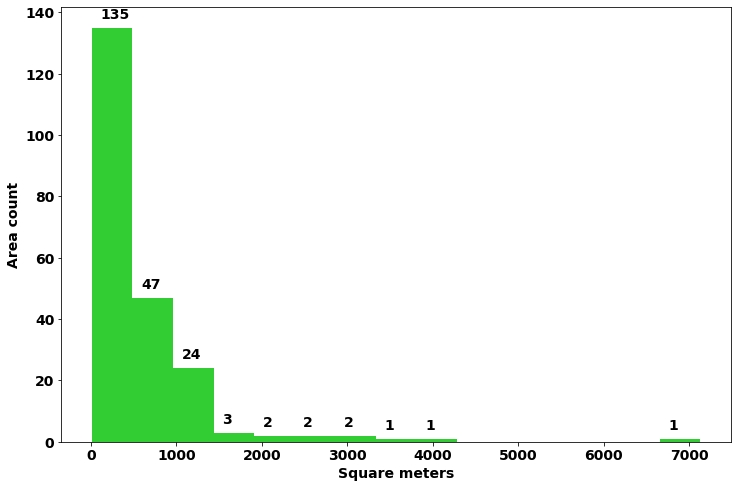

1390.0 9901 6392.0


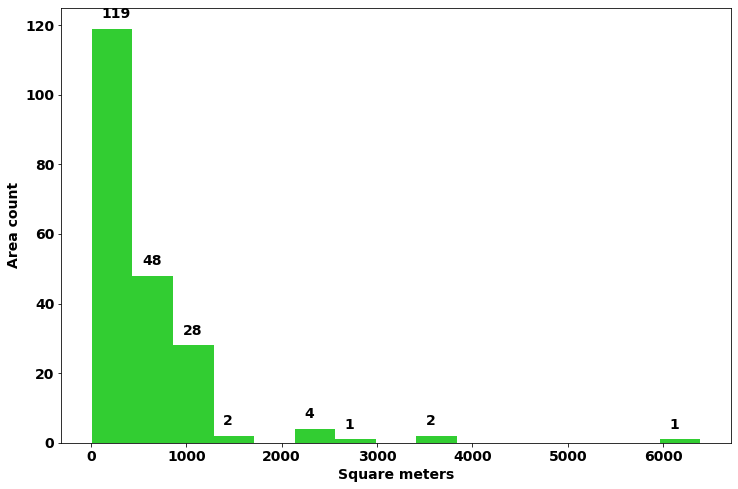

1391.0 050X 5046.0


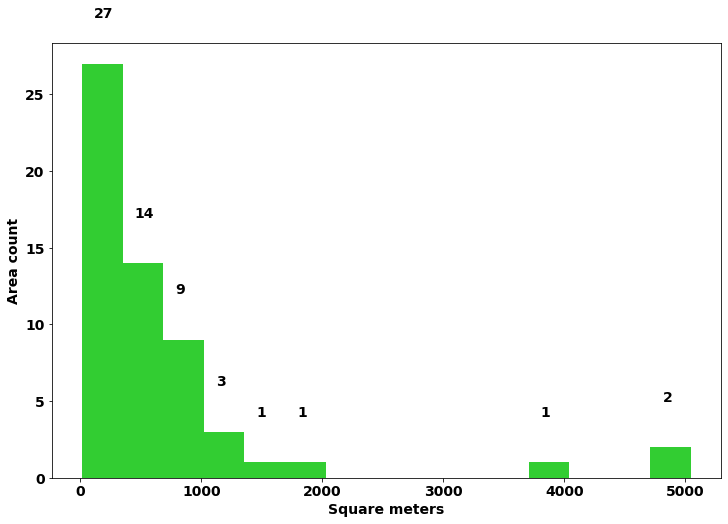

1394.0 175U 3836.0


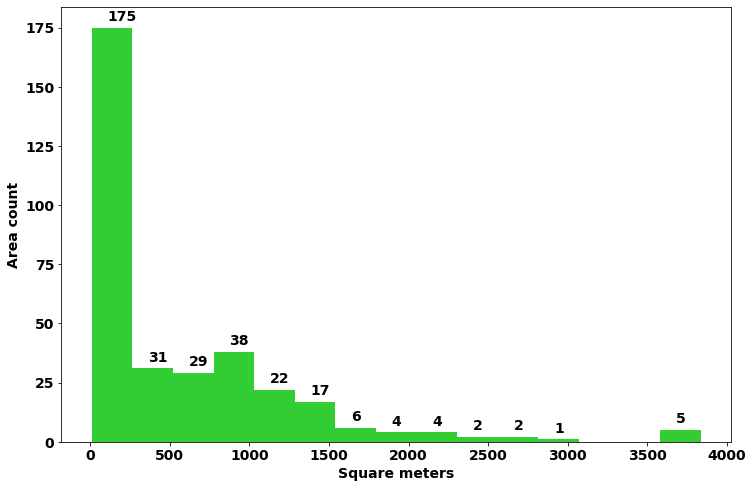

1389.0 9901 6392.0


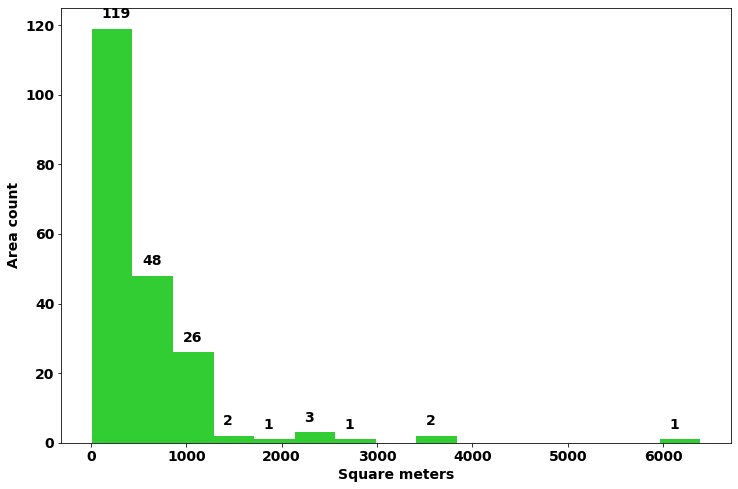

1384.0 9901 6392.0


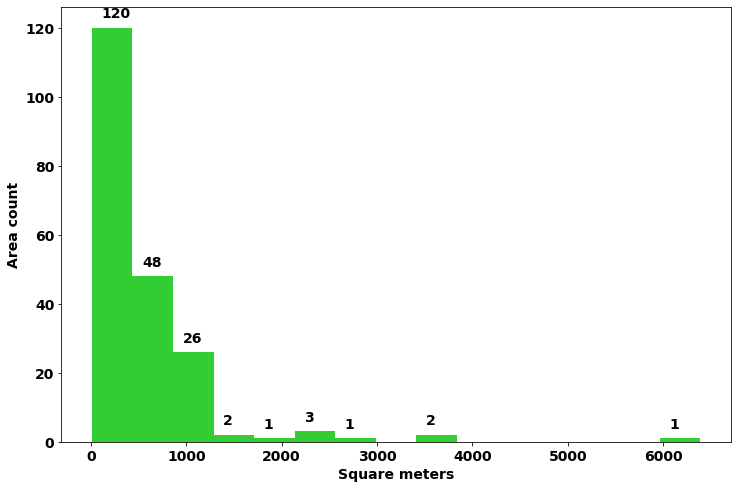

1393.0 9901 7134.0


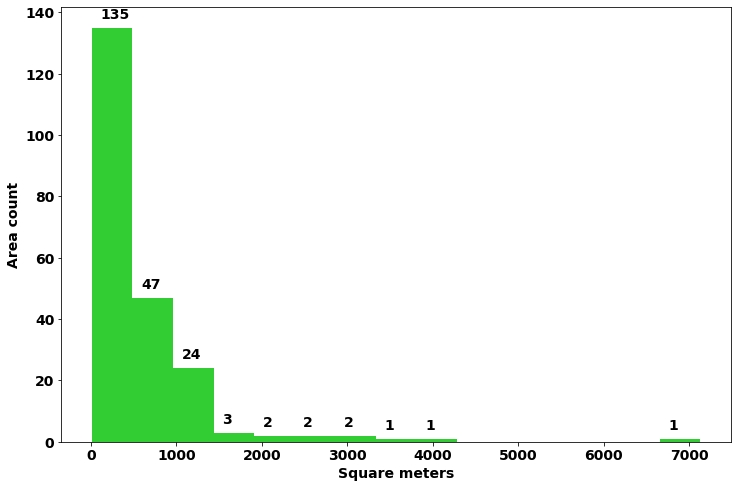

1395.0 175U 3994.0


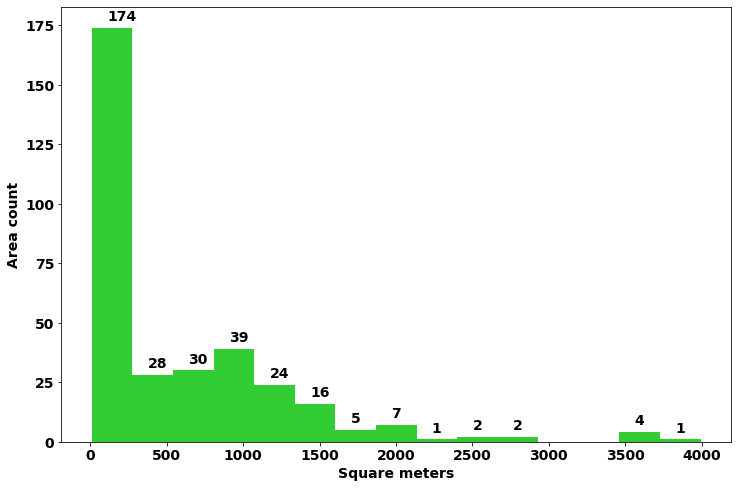

1396.0 080U 3747.0


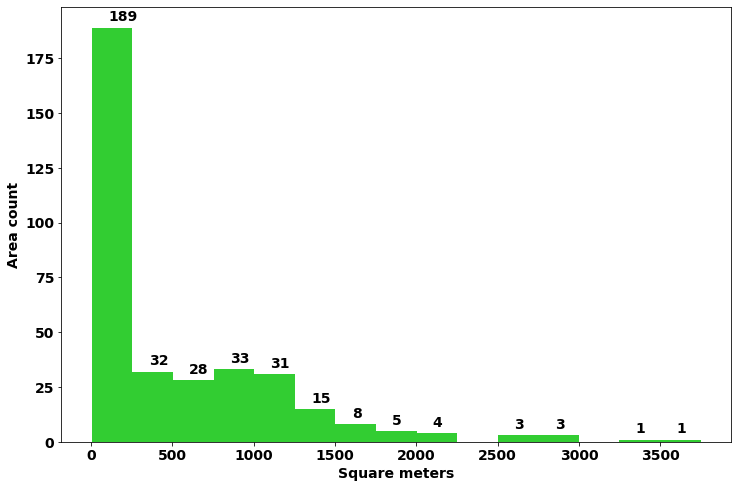

1376.0 030U 4900.0


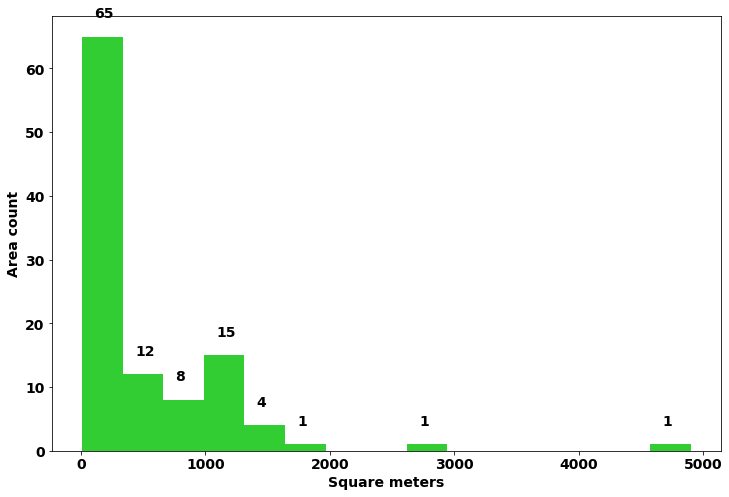

1383.0 9901 6392.0


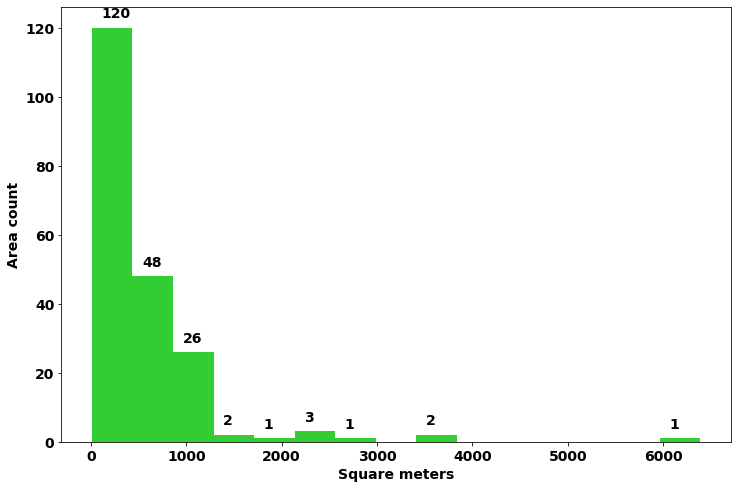

In [28]:
# Square meter outliers

plt.rcParams['font.size'] = 14
plt.rcParams['font.weight'] = 'bold'


# Get the data
cursor.execute("SELECT r.project_id, gross_tonnage, sum(amount) FROM routed as r"
    " LEFT JOIN projects as p ON p.project_id=r.project_id"
    " GROUP BY r.project_id, gross_tonnage")
data = np.array(cursor.fetchall()).astype('float32')
ships = data[:, 0]

for ship in ships:
    cursor.execute("SELECT area, squares FROM areas WHERE project_id={} AND squares IS NOT NULL".format(ship))
    data = np.array(cursor.fetchall())
    codes = data[:, 0]
    data = data[:, 1].astype('float32')
    area = codes[np.argmax(data)]
    mx = data.max()
    print(ship, area, mx)
    plt.figure(figsize=(12, 8))
    density, bins, _ = plt.hist(data, bins=15, color='limegreen')
    count = np.array(density).astype('int32')
    outliers = []
    for x,y,num in zip(bins, density, count):
        if num != 0:
            plt.text(x+100, y+3, num, fontsize=14)
            if num==1:
                outliers.append(x)

    plt.xlabel('Square meters', fontsize=14, fontweight='bold')
    plt.ylabel('Area count', fontsize=14, fontweight='bold')
    if ship==1389:
        plt.savefig('areaoutliers.png')
    plt.show()